In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [274]:
data = pd.read_csv("heart.csv")

In [275]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [276]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [277]:
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

In [278]:
data = pd.get_dummies(
    data= data,
    prefix= cat_variables,
    columns= cat_variables
)

In [279]:
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [280]:
# Checking the corelation of each features
data.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,-0.055750,0.055750,0.166607,...,-0.011335,0.032042,0.145727,-0.230566,0.136798,-0.215793,0.215793,0.138397,0.185568,-0.258067
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,-0.005133,0.005133,0.048824,...,-0.041348,0.049855,0.053166,-0.116851,0.090447,-0.155101,0.155101,-0.007912,0.099207,-0.096146
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,0.200092,-0.200092,-0.120531,...,-0.006634,0.017365,0.177077,-0.038470,-0.133106,0.034166,-0.034166,-0.083371,-0.050953,0.094027
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,-0.120076,0.120076,0.131176,...,-0.039249,0.026885,-0.011656,-0.093028,0.127110,-0.060451,0.060451,0.105102,0.107006,-0.161730
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,0.189186,-0.189186,-0.354963,...,0.134580,0.100025,0.125793,0.023801,-0.157879,0.370425,-0.370425,-0.073316,-0.342581,0.383397
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,-0.105734,0.105734,0.280026,...,-0.106212,0.032231,0.086794,-0.116719,0.055958,-0.408752,0.408752,0.322130,0.283295,-0.450577
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,-0.305445,0.305445,0.516716,...,-0.212964,-0.054790,0.010670,-0.091580,0.102527,-0.494282,0.494282,0.122527,0.554134,-0.622164
Sex_F,-0.055750,-0.005133,0.200092,-0.120076,0.189186,-0.105734,-0.305445,1.000000,-1.000000,-0.183876,...,0.066486,0.004031,0.049518,0.010634,-0.063715,0.190664,-0.190664,-0.066036,-0.116077,0.150942
Sex_M,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,-1.000000,1.000000,0.183876,...,-0.066486,-0.004031,-0.049518,-0.010634,0.063715,-0.190664,0.190664,0.066036,0.116077,-0.150942
ChestPainType_ASY,0.166607,0.048824,-0.120531,0.131176,-0.354963,0.280026,0.516716,-0.183876,0.183876,1.000000,...,-0.577670,-0.249003,0.002289,-0.063606,0.076438,-0.430034,0.430034,0.103407,0.303645,-0.359443


<Axes: >

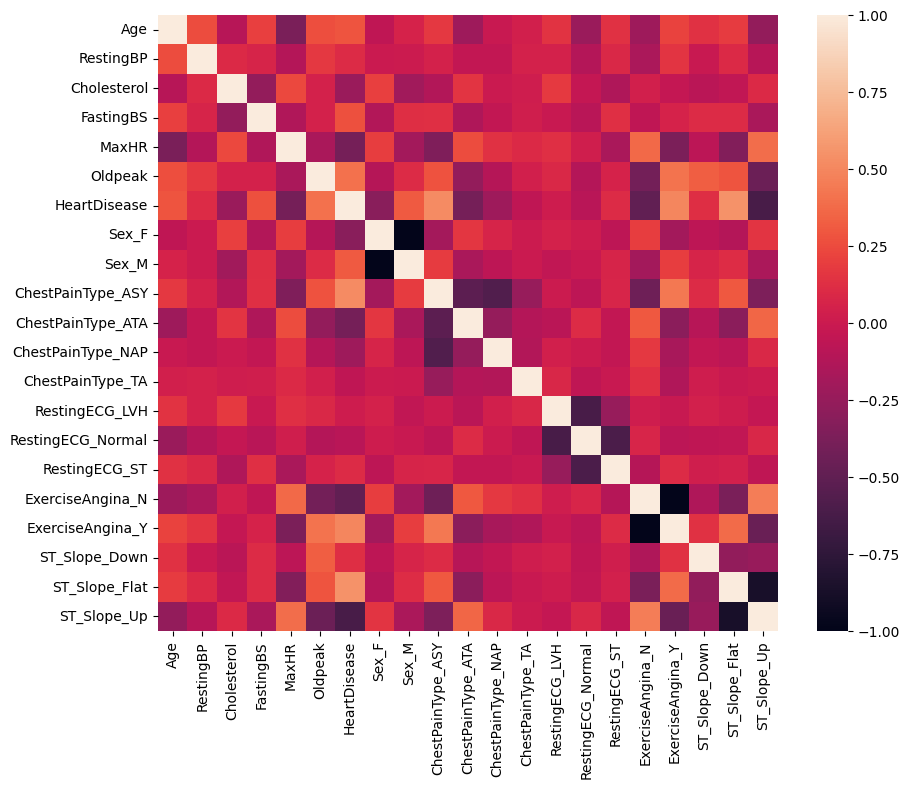

In [281]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr())

In [282]:
features = data.columns[:-1]
X = data[features]
y = data["HeartDisease"]

In [283]:
start_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=45)
train_idx, idx_ = next(start_shuffle_split.split(X, y))
start_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=45)
cv_idx, test_idx = next(start_shuffle_split.split(X.loc[idx_], y.loc[idx_]))

In [284]:
X_train = X.loc[train_idx]
y_train = y.loc[train_idx]

X_test = X.loc[test_idx]
y_test = y.loc[test_idx]

X_cv = X.loc[cv_idx]
y_cv = y.loc[cv_idx]

In [298]:
depths = range(1, 5)
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]

In [299]:
train_scores = []
cv_scores = []
for h in depths:
  clf = RandomForestClassifier(max_depth = h, random_state=45)
  clf.fit(X_train, y_train)
  y_train_preds = clf.predict(X_train)
  train_score = accuracy_score(y_train, y_train_preds)
  train_scores.append(train_score)
  y_cv_preds = clf.predict(X_cv)
  cv_score = accuracy_score(y_cv, y_cv_preds)
  cv_scores.append(cv_score)

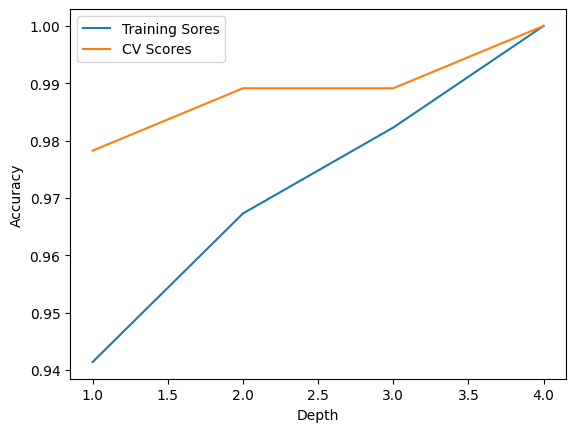

In [300]:
fig, ax = plt.subplots()
ax.plot(depths, train_scores, label="Training Sores")
ax.plot(depths, cv_scores, label= "CV Scores")
plt.xlabel("Depth")
ax.set_ylabel("Accuracy")
plt.legend();

In [301]:
train_scores = []
cv_scores = []
for split in min_samples_split_list:
  clf = RandomForestClassifier(min_samples_split= split, random_state=45)
  clf.fit(X_train, y_train)
  y_train_preds = clf.predict(X_train)
  train_score = accuracy_score(y_train, y_train_preds)
  train_scores.append(train_score)
  y_cv_preds = clf.predict(X_cv)
  cv_score = accuracy_score(y_cv, y_cv_preds)
  cv_scores.append(cv_score)

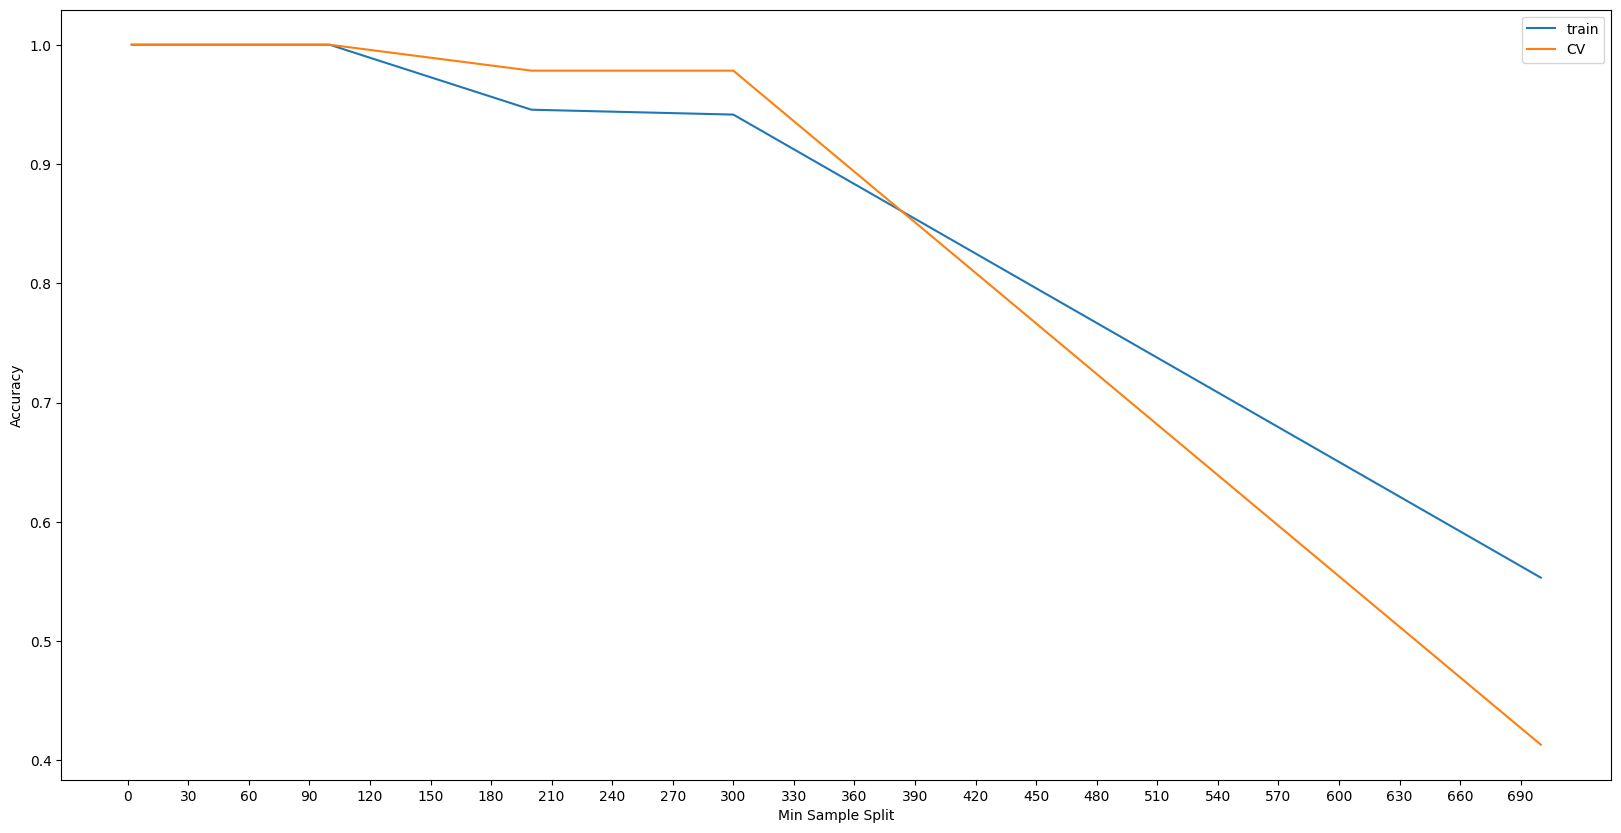

In [311]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(min_samples_split_list, train_scores, label= "train")
ax.plot(min_samples_split_list, cv_scores, label= "CV")
plt.xlabel("Min Sample Split")
ax.set_ylabel("Accuracy")
plt.xticks(range(0, 700, 30))
plt.legend();

According to above graph, we can say that in the range of 100 to 380 when min split increases, accuracy of both training and cv sets have decreased. So we have to check how the accuracy behaves with the max depth.

In [303]:
rf_params = {
    "max_depth": depths,
    "min_samples_split": min_samples_split_list 
}

In [304]:
GR = GridSearchCV(
    estimator= RandomForestClassifier(random_state= 45),
    param_grid= rf_params,
    scoring= accuracy_score
)

In [305]:
GR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3112, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most 

GridSearchCV(estimator=RandomForestClassifier(random_state=45),
             param_grid={'max_depth': range(1, 5),
                         'min_samples_split': [2, 10, 30, 50, 100, 200, 300,
                                               700]},
             scoring=<function accuracy_score at 0x7f905fea24d0>)

In [307]:
# The best parameters which should be choosen according to the GridSearchCV
GR.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [316]:
# Classification Report for test set
pd.DataFrame(classification_report(y_test, GR.predict(X_test), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.794872,0.913043,0.897436,0.930881
recall,0.868852,1.000000,0.913043,0.934426,0.913043
f1-score,0.929825,0.885714,0.913043,0.907769,0.914961
support,61.000000,31.000000,0.913043,92.000000,92.000000
